In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Set the working directorty
working_dir = r"C:/Users/valentin.stuhlfauth/OneDrive - univ-lyon2.fr/1_WSL/1_SGR visuals/git_repo_sgr_visuals"
os.chdir(working_dir)

import plot_functions
print(plot_functions.__file__)

# Set font
plt.rcParams['font.family'] = 'Arial'

c:\Users\valentin.stuhlfauth\OneDrive - univ-lyon2.fr\1_WSL\1_SGR visuals\git_repo_sgr_visuals\plot_functions.py


In [33]:
df_passenger = pd.read_csv(r'1_data_prep\indicator_economy\gdp_cp.csv')

In [34]:
df_passenger

,Unnamed: 0,freq,unit,na_item,geo,year,value
0,0,A,CP_MPPS_EU27_2020,B1GQ,AL,1975,NaN
1,1,A,CP_MPPS_EU27_2020,B1GQ,AT,1975,NaN
2,2,A,CP_MPPS_EU27_2020,B1GQ,BA,1975,NaN
3,3,A,CP_MPPS_EU27_2020,B1GQ,BE,1975,NaN
4,4,A,CP_MPPS_EU27_2020,B1GQ,BG,1975,NaN
...,...,...,...,...,...,...,...
2045,2045,A,CP_MPPS_EU27_2020,B1GQ,SE,2024,475260.8
2046,2046,A,CP_MPPS_EU27_2020,B1GQ,SI,2024,76748.3
2047,2047,A,CP_MPPS_EU27_2020,B1GQ,SK,2024,163337.8
2048,2048,A,CP_MPPS_EU27_2020,B1GQ,TR,2024,2398821.5


In [35]:
## Country
df_rail = pd.read_csv(r'1_data_prep\indicator_energy\energy_use.csv')

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Years to compare
year_start = 2013
year_end = 2022

# List of countries to include
study_countries = ['AT', 'BE', 'BG', 'HR','CY', 'CZ', 'DK', 'EE', 'FI',  
                   'FR', 'DE', 'GR', 'HU', 'IE', 'IT', 'LV', 'LT', 'LU', 
                   'MT', 'NL', 'PL', 'PT', 'RO', 'SK', 'SI', 'ES', 'SE', 
                   'UK', 'NO', 'CH', 'IS', 'LI']

df_rail = df_rail[df_rail['geo'].isin(study_countries)]
df_passenger = df_passenger[df_passenger['geo'].isin(study_countries)]

# Merge start and end values
df_rail_start = df_rail[df_rail["year"]==year_start]
df_passen_start = df_passenger[df_passenger["year"]==year_start]
df_rail_end = df_rail[df_rail["year"]==year_end]
df_passen_end = df_passenger[df_passenger["year"]==year_end]


# Merge start and end values
df_start = df_rail_start[['geo','value']].merge(df_passen_start[['geo','value']], on='geo', suffixes=('_rail', '_pass'))
df_end   = df_rail_end[['geo','value']].merge(df_passen_end[['geo','value']], on='geo', suffixes=('_rail', '_pass'))
df_all   = df_start.merge(df_end, on='geo', suffixes=('_start', '_end'))

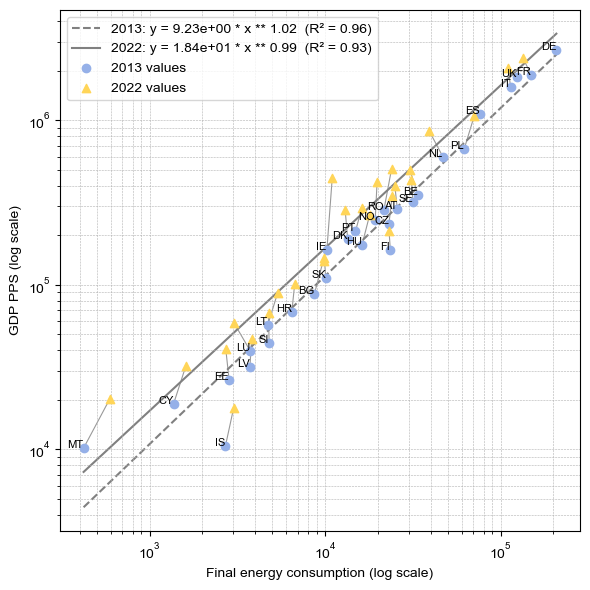

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Ensure values are positive for log transformation
df_start = df_all[(df_all['value_rail_start'] > 0) & (df_all['value_pass_start'] > 0)].copy()
df_end = df_all[(df_all['value_rail_end'] > 0) & (df_all['value_pass_end'] > 0)].copy()

# Log-transform for regression
x_start_log = np.log(df_start['value_rail_start'])
y_start_log = np.log(df_start['value_pass_start'])
x_end_log = np.log(df_end['value_rail_end'])
y_end_log = np.log(df_end['value_pass_end'])

# Regressions
slope_start, intercept_start, r_value_start, _, _ = linregress(x_start_log, y_start_log)
slope_end, intercept_end, r_value_end, _, _ = linregress(x_end_log, y_end_log)

# X values for regression lines
x_vals = np.logspace(
    min(np.log10(df_all[['value_rail_start', 'value_rail_end']].min())),
    max(np.log10(df_all[['value_rail_start', 'value_rail_end']].max())),
    200
)

# Regression fits
y_start_fit = np.exp(intercept_start) * x_vals ** slope_start
y_end_fit = np.exp(intercept_end) * x_vals ** slope_end

# Labels for legend
label_start = f'{year_start}: y = {np.exp(intercept_start):.2e} * x ** {slope_start:.2f}  (R² = {r_value_start**2:.2f})'
label_end = f'{year_end}: y = {np.exp(intercept_end):.2e} * x ** {slope_end:.2f}  (R² = {r_value_end**2:.2f})'

# Plot
plt.figure(figsize=(6, 6))

# Plot regression lines first (so they go to back)
plt.plot(x_vals, y_start_fit, '--', color='grey', linewidth=1.5, label=label_start, zorder=1)
plt.plot(x_vals, y_end_fit, '-', color='grey', linewidth=1.5, label=label_end, zorder=1)

# Plot start and end points
plt.scatter(df_start['value_rail_start'], df_start['value_pass_start'], 
            c='#95b0e8', marker='o', label=f'{year_start} values', zorder=2)
plt.scatter(df_end['value_rail_end'], df_end['value_pass_end'], 
            c='#ffd558', marker='^', label=f'{year_end} values', zorder=2)

# Draw connection lines between start and end points
common_countries = set(df_start['geo']) & set(df_end['geo'])
for country in common_countries:
    row_start = df_start[df_start['geo'] == country].iloc[0]
    row_end = df_end[df_end['geo'] == country].iloc[0]
    plt.plot(
        [row_start['value_rail_start'], row_end['value_rail_end']],
        [row_start['value_pass_start'], row_end['value_pass_end']],
        color='grey', alpha=0.8, linewidth=0.8, zorder=1
    )

# Annotate all unique countries
all_labeled = pd.concat([
    df_start[['geo', 'value_rail_start', 'value_pass_start']].rename(
        columns={'value_rail_start': 'x', 'value_pass_start': 'y'}),
    df_end[['geo', 'value_rail_end', 'value_pass_end']].rename(
        columns={'value_rail_end': 'x', 'value_pass_end': 'y'})
])

# Keep one point per country
all_labeled = all_labeled.drop_duplicates('geo')
for _, row in all_labeled.iterrows():
    plt.text(row['x'], row['y'], row['geo'], fontsize=8, ha='right', zorder=3)

# Axis scales and labels
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Final energy consumption (log scale)')
plt.ylabel('GDP PPS (log scale)')
#plt.title('Change in rail stock and passenger use per country (log-log)')
plt.grid(True, which='both', ls='--', linewidth=0.4)
plt.legend()
plt.tight_layout()
plt.show()


In [6]:
all_labeled.rename(columns={'x':'Final energy','y':'GDP'})

,geo,Final energy,GDP
0,AT,25801.476,290860.7
1,BE,34011.623,353323.4
2,BG,8680.757,87310.1
3,CY,1372.455,18945.8
4,CZ,23131.377,235367.1
5,DE,208057.421,2671237.9
6,DK,13460.545,189957.7
7,EE,2840.316,26477.0
8,ES,76055.579,1097105.4
9,FI,23561.862,162240.8


In [7]:
all_labeled.rename(columns={'x':'Final energy','y':'GDP'}).to_excel(r'figure_19.xlsx')

## Energy intensity

https://ourworldindata.org/grapher/energy-intensity-of-economies?tab=line
IEA, IRENA, UNSD, WHO, and World Bank (2025) – processed by Our World in Data. “Energy intensity” [dataset]. IEA, IRENA, UNSD, WHO, and World Bank, “World Development Indicators” [original data]. Retrieved August 4, 2025 from https://archive.ourworldindata.org/20250704-091220/grapher/energy-intensity-of-economies.html (archived on July 4, 2025).

In [8]:
df = pd.read_csv(r'0_data_other_sources\energy-intensity-of-economies.csv')

In [9]:
df=df[df['Year'].isin([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])]

In [10]:
df['Entity'].unique()

array(['East Asia and Pacific (WB)', 'Europe and Central Asia (WB)',
       'Latin America and Caribbean (WB)',
       'Middle East and North Africa (WB)', 'North America (WB)',
       'South Asia (WB)', 'Sub-Saharan Africa (WB)', 'World'],
      dtype=object)

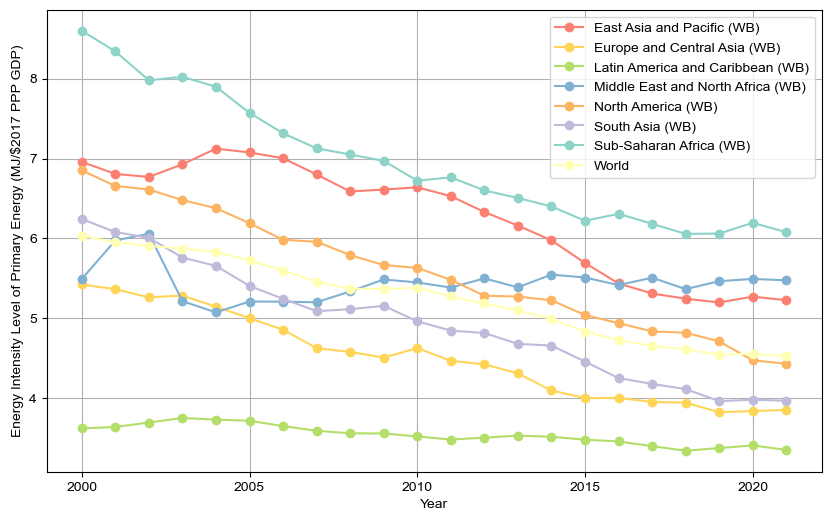

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Define colors
colors = ['#fb8072', '#ffd558', '#b3de69', '#80b1d3', '#fdb462', '#bebada', '#8dd3c7', '#ffffb3']

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Group by Entity and plot each group
for i, (entity, group) in enumerate(df.groupby('Entity')):
    plt.plot(group['Year'], group['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'],
             marker='o', label=entity, color=colors[i % len(colors)])

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Energy Intensity Level of Primary Energy (MJ/$2017 PPP GDP)')
#plt.title('Energy Intensity Level Over Time by Entity')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [12]:
df.rename(columns={'x':'Final energy','y':'GDP'}).to_excel(r'figure_20.xlsx')

## Well-being/GDP

C:\Users\valentin.stuhlfauth\AppData\Local\Temp\ipykernel_14836\1121164232.py:7: DtypeWarning: Columns (2,3,7,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ewbi = pd.read_csv(r'0_data_other_sources\unified_all_levels_1_to_5.csv')


Merged dataset shape: (582, 9)


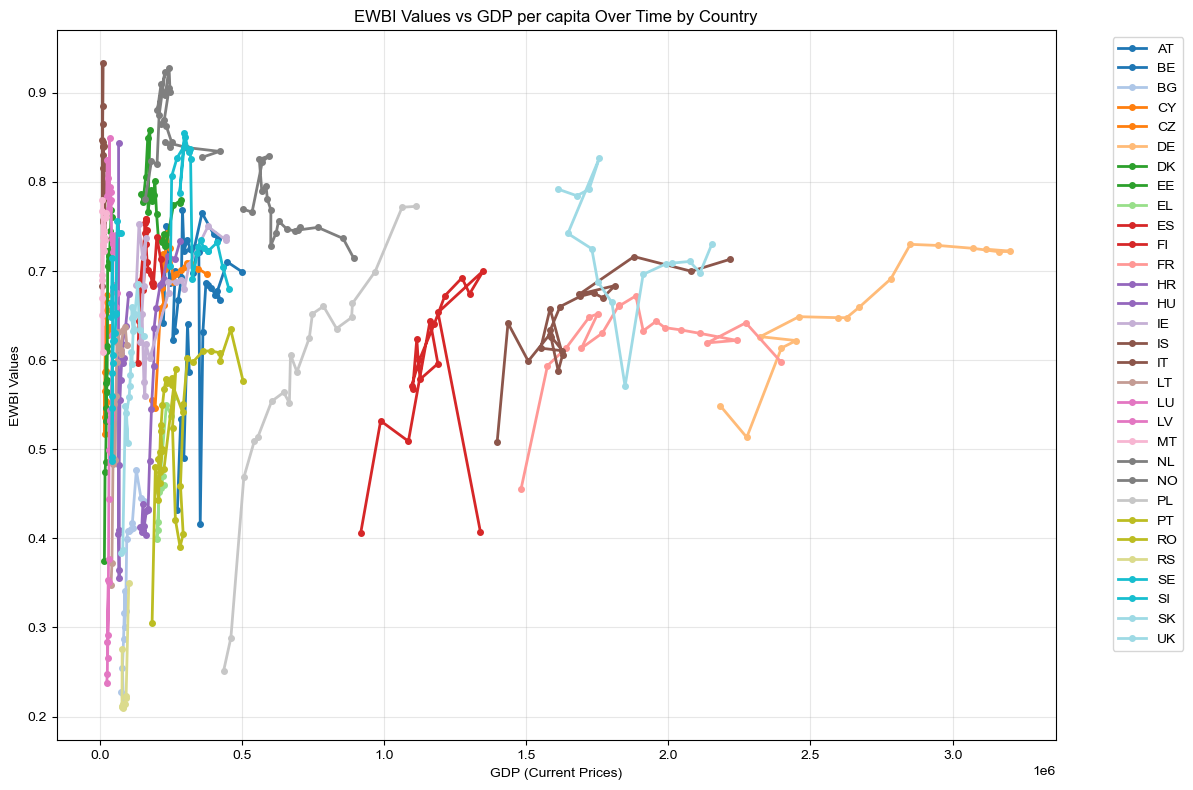

Number of country-year observations: 582
Countries included: ['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'EL', 'ES', 'FI', 'FR', 'HR', 'HU', 'IE', 'IS', 'IT', 'LT', 'LU', 'LV', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO', 'RS', 'SE', 'SI', 'SK', 'UK']
Years covered: [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the datasets
df_gdp = pd.read_csv(r'1_data_prep\indicator_economy\gdp_cp.csv')
df_ewbi = pd.read_csv(r'0_data_other_sources\unified_all_levels_1_to_5.csv')

# Filter EWBI data according to your criteria
df_ewbi_filtered = df_ewbi[
    (df_ewbi['EU priority'].isna()) & 
    (df_ewbi['Secondary'].isna()) & 
    (df_ewbi['Primary and raw data'].isna()) & 
    (df_ewbi['Decile'] == 'All')
].copy()

# The countries in EWBI are already country codes, so we don't need mapping
df_ewbi_filtered['geo'] = df_ewbi_filtered['Country']

# Remove 'All Countries' if it exists
df_ewbi_filtered = df_ewbi_filtered[df_ewbi_filtered['geo'] != 'All Countries']

# Merge the datasets on country and year
df_merged = pd.merge(
    df_gdp, 
    df_ewbi_filtered[['geo', 'Year', 'Value']], 
    left_on=['geo', 'year'], 
    right_on=['geo', 'Year'], 
    how='inner'
)

print(f"Merged dataset shape: {df_merged.shape}")

if len(df_merged) > 0:
    # Create the line plot
    plt.figure(figsize=(12, 8))

    # Get unique countries and assign colors
    countries = sorted(df_merged['geo'].unique())
    colors = plt.cm.tab20(np.linspace(0, 1, len(countries)))
    
    # Plot line for each country
    for i, country in enumerate(countries):
        country_data = df_merged[df_merged['geo'] == country].sort_values('year')
        plt.plot(country_data['value'], country_data['Value'], 
                marker='o', label=country, color=colors[i], linewidth=2, markersize=4)

    plt.xlabel('GDP (Current Prices)')
    plt.ylabel('EWBI Values')
    plt.title('EWBI Values vs GDP per capita Over Time by Country')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Display basic statistics
    print(f"Number of country-year observations: {len(df_merged)}")
    print(f"Countries included: {sorted(df_merged['geo'].unique())}")
    print(f"Years covered: {sorted(df_merged['year'].unique())}")
    
    # Save data to Excel
    #df_merged[['geo', 'year', 'value', 'Value']].rename(
    #    columns={'value': 'GDP', 'Value': 'EWBI'}
    #).to_excel(r'figure_21_ewbi_gdp.xlsx', index=False)
    
else:
    print("No data available after merging.")

## Well-being/Energy

In [ ]:
pd.read_csv(r'1_data_prep\indicator_energy\energy_use.csv')

C:\Users\valentin.stuhlfauth\AppData\Local\Temp\ipykernel_4172\36247957.py:8: DtypeWarning: Columns (2,3,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ewbi = pd.read_csv(r'0_data_other_sources\unified_all_levels_1_to_5_pca_weighted.csv')


Merged dataset shape: (310, 5)


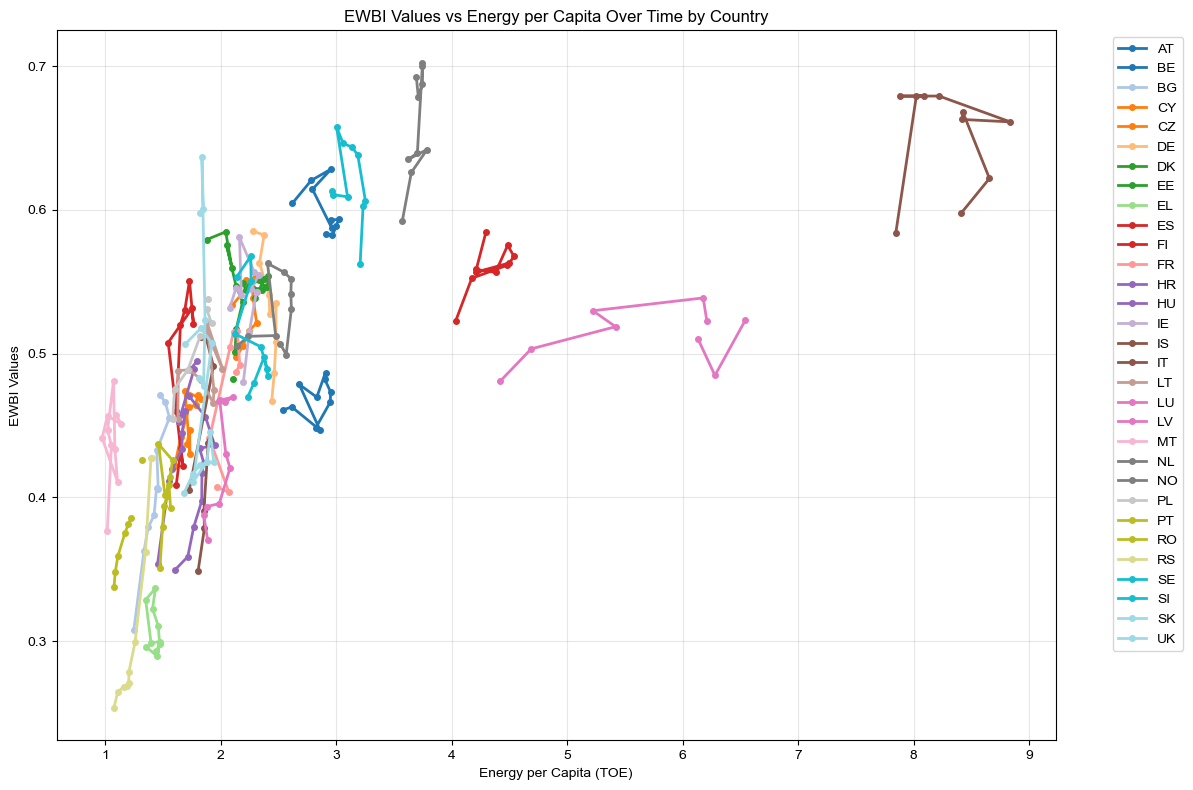

Number of country-year observations: 310
Countries included: ['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'EL', 'ES', 'FI', 'FR', 'HR', 'HU', 'IE', 'IS', 'IT', 'LT', 'LU', 'LV', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO', 'RS', 'SE', 'SI', 'SK', 'UK']
Years covered: [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the datasets
df_energy = pd.read_csv(r'1_data_prep\indicator_energy\energy_use.csv')
df_population = pd.read_csv(r'1_data_prep\indicator_x-axis\population.csv')
df_ewbi = pd.read_csv(r'0_data_other_sources\unified_all_levels_1_to_5_pca_weighted.csv')

# Filter EWBI data according to your criteria
df_ewbi_filtered = df_ewbi[
    (df_ewbi['EU priority'].isna()) & 
    (df_ewbi['Secondary'].isna()) & 
    (df_ewbi['Primary and raw data'].isna()) & 
    (df_ewbi['Decile'] == 'All')
].copy()

# The countries in EWBI are already country codes, so we don't need mapping
df_ewbi_filtered['geo'] = df_ewbi_filtered['Country']

# Remove 'All Countries' if it exists
df_ewbi_filtered = df_ewbi_filtered[df_ewbi_filtered['geo'] != 'All Countries']

# Merge energy data with population data to compute energy per capita
df_energy_pop = pd.merge(
    df_energy, 
    df_population[['geo', 'year', 'value']], 
    on=['geo', 'year'], 
    how='inner',
    suffixes=('_energy', '_population')
)

# Calculate energy per capita
df_energy_pop['energy_per_capita'] = df_energy_pop['value_energy'] / df_energy_pop['value_population'] * 1000

# Merge with EWBI data
df_merged = pd.merge(
    df_energy_pop[['geo', 'year', 'energy_per_capita']], 
    df_ewbi_filtered[['geo', 'Year', 'Value']], 
    left_on=['geo', 'year'], 
    right_on=['geo', 'Year'], 
    how='inner'
)

print(f"Merged dataset shape: {df_merged.shape}")

if len(df_merged) > 0:
    # Create the line plot
    plt.figure(figsize=(12, 8))

    # Get unique countries and assign colors
    countries = sorted(df_merged['geo'].unique())
    colors = plt.cm.tab20(np.linspace(0, 1, len(countries)))
    
    # Plot line for each country
    for i, country in enumerate(countries):
        country_data = df_merged[df_merged['geo'] == country].sort_values('year')
        plt.plot(country_data['energy_per_capita'], country_data['Value'], 
                marker='o', label=country, color=colors[i], linewidth=2, markersize=4)

    plt.xlabel('Energy per Capita (TOE)')
    plt.ylabel('EWBI Values')
    plt.title('EWBI Values vs Energy per Capita Over Time by Country')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Display basic statistics
    print(f"Number of country-year observations: {len(df_merged)}")
    print(f"Countries included: {sorted(df_merged['geo'].unique())}")
    print(f"Years covered: {sorted(df_merged['year'].unique())}")
    
    # Save data to Excel
    df_merged[['geo', 'year', 'energy_per_capita', 'Value']].rename(
        columns={'energy_per_capita': 'Energy_per_Capita', 'Value': 'EWBI'}
    ).to_excel(r'figure_22_ewbi_energy_per_capita.xlsx', index=False)
    
else:
    print("No data available after merging.")

C:\Users\valentin.stuhlfauth\AppData\Local\Temp\ipykernel_4172\1497968883.py:8: DtypeWarning: Columns (2,3,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ewbi = pd.read_csv(r'0_data_other_sources\unified_all_levels_1_to_5_pca_weighted.csv')


Merged dataset shape: (310, 5)


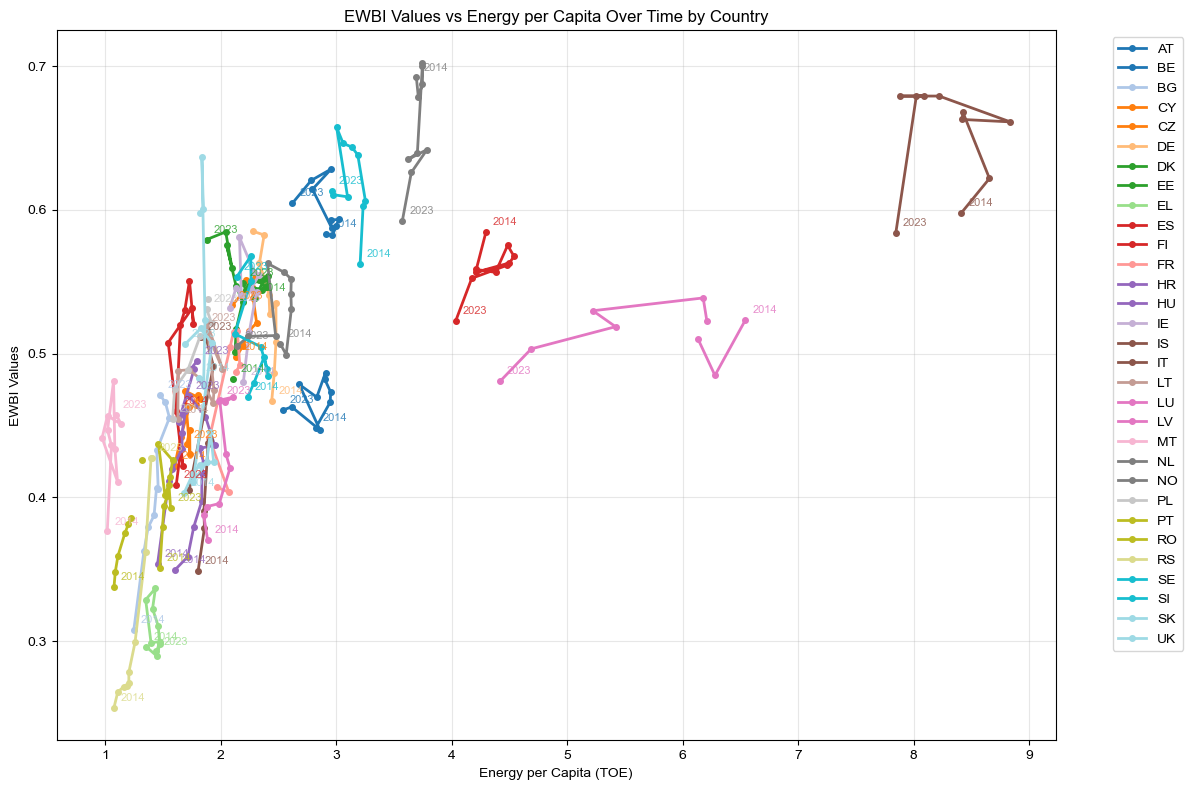

Number of country-year observations: 310
Countries included: ['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'EL', 'ES', 'FI', 'FR', 'HR', 'HU', 'IE', 'IS', 'IT', 'LT', 'LU', 'LV', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO', 'RS', 'SE', 'SI', 'SK', 'UK']
Years covered: [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the datasets
df_energy = pd.read_csv(r'1_data_prep\indicator_energy\energy_use.csv')
df_population = pd.read_csv(r'1_data_prep\indicator_x-axis\population.csv')
df_ewbi = pd.read_csv(r'0_data_other_sources\unified_all_levels_1_to_5_pca_weighted.csv')

# Filter EWBI data according to your criteria
df_ewbi_filtered = df_ewbi[
    (df_ewbi['EU priority'].isna()) & 
    (df_ewbi['Secondary'].isna()) & 
    (df_ewbi['Primary and raw data'].isna()) & 
    (df_ewbi['Decile'] == 'All')
].copy()

# The countries in EWBI are already country codes, so we don't need mapping
df_ewbi_filtered['geo'] = df_ewbi_filtered['Country']

# Remove 'All Countries' if it exists
df_ewbi_filtered = df_ewbi_filtered[df_ewbi_filtered['geo'] != 'All Countries']

# Merge energy data with population data to compute energy per capita
df_energy_pop = pd.merge(
    df_energy, 
    df_population[['geo', 'year', 'value']], 
    on=['geo', 'year'], 
    how='inner',
    suffixes=('_energy', '_population')
)

# Calculate energy per capita
df_energy_pop['energy_per_capita'] = df_energy_pop['value_energy'] / df_energy_pop['value_population'] * 1000

# Merge with EWBI data
df_merged = pd.merge(
    df_energy_pop[['geo', 'year', 'energy_per_capita']], 
    df_ewbi_filtered[['geo', 'Year', 'Value']], 
    left_on=['geo', 'year'], 
    right_on=['geo', 'Year'], 
    how='inner'
)

print(f"Merged dataset shape: {df_merged.shape}")

if len(df_merged) > 0:
    # Create the line plot
    plt.figure(figsize=(12, 8))

    # Get unique countries and assign colors
    countries = sorted(df_merged['geo'].unique())
    colors = plt.cm.tab20(np.linspace(0, 1, len(countries)))
    
    # Plot line for each country
    for i, country in enumerate(countries):
        country_data = df_merged[df_merged['geo'] == country].sort_values('year')
        plt.plot(country_data['energy_per_capita'], country_data['Value'], 
                marker='o', label=country, color=colors[i], linewidth=2, markersize=4)
        
        # Add annotations for first and last points
        if len(country_data) > 0:
            # First point
            first_point = country_data.iloc[0]
            plt.annotate(f'{int(first_point["year"])}', 
                        xy=(first_point['energy_per_capita'], first_point['Value']),
                        xytext=(5, 5), textcoords='offset points',
                        fontsize=8, color=colors[i], alpha=0.8)
            
            # Last point (only if different from first)
            if len(country_data) > 1:
                last_point = country_data.iloc[-1]
                plt.annotate(f'{int(last_point["year"])}', 
                            xy=(last_point['energy_per_capita'], last_point['Value']),
                            xytext=(5, 5), textcoords='offset points',
                            fontsize=8, color=colors[i], alpha=0.8)

    plt.xlabel('Energy per Capita (TOE)')
    plt.ylabel('EWBI Values')
    plt.title('EWBI Values vs Energy per Capita Over Time by Country')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Display basic statistics
    print(f"Number of country-year observations: {len(df_merged)}")
    print(f"Countries included: {sorted(df_merged['geo'].unique())}")
    print(f"Years covered: {sorted(df_merged['year'].unique())}")
    
    # Save data to Excel
    df_merged[['geo', 'year', 'energy_per_capita', 'Value']].rename(
        columns={'energy_per_capita': 'Energy_per_Capita', 'Value': 'EWBI'}
    ).to_excel(r'figure_22_ewbi_energy_per_capita.xlsx', index=False)
    
else:
    print("No data available after merging.")